In [118]:
import pandas as pd
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import seaborn as sns
import zipfile
from google.colab import drive
import pandas as pd
import glob
import os
import datetime
import string

import nltk
from nltk.corpus import stopwords
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
drive.mount('/content/drive')

In [45]:
dataset_path = "/content/drive/MyDrive/disaster_dataset"
zip_ref = zipfile.ZipFile(f"{dataset_path}/Natural-Hazards-Twitter-Dataset-master.zip", 'r')
zip_ref.extractall(f"{dataset_path}/extracted")
zip_ref.close()

In [115]:
path = f"{dataset_path}/extracted/Natural-Hazards-Twitter-Dataset-master" # use your path
all_files = glob.glob(f"{path}/*.csv")


In [116]:
all_files
files_dict = {}
for i in range(len(all_files)):
  
  files_dict.update({all_files[i].split('/')[7].split('.')[0] : all_files[i]})

files_dict

{'2011Tornado_Summary': '/content/drive/MyDrive/disaster_dataset/extracted/Natural-Hazards-Twitter-Dataset-master/2011Tornado_Summary.csv',
 '2012Sandy_Summary': '/content/drive/MyDrive/disaster_dataset/extracted/Natural-Hazards-Twitter-Dataset-master/2012Sandy_Summary.csv',
 '2013Floods_Summary': '/content/drive/MyDrive/disaster_dataset/extracted/Natural-Hazards-Twitter-Dataset-master/2013Floods_Summary.csv',
 '2016Blizzard_Summary': '/content/drive/MyDrive/disaster_dataset/extracted/Natural-Hazards-Twitter-Dataset-master/2016Blizzard_Summary.csv',
 '2016Matthew_Summary': '/content/drive/MyDrive/disaster_dataset/extracted/Natural-Hazards-Twitter-Dataset-master/2016Matthew_Summary.csv',
 '2017Hurricane_Summary': '/content/drive/MyDrive/disaster_dataset/extracted/Natural-Hazards-Twitter-Dataset-master/2017Hurricane_Summary.csv',
 '2018Michael_Summary': '/content/drive/MyDrive/disaster_dataset/extracted/Natural-Hazards-Twitter-Dataset-master/2018Michael_Summary.csv',
 '2018Wildfires_Summ

## Analysing Dataset

In [48]:
testing_df = pd.read_csv(files_dict['2019Dorian_Summary'])
testing_df = testing_df.drop('num',axis=1)

In [49]:
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7140 entries, 0 to 7139
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   text       7140 non-null   object 
 1   timestamp  7140 non-null   float64
 2   label      7140 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 167.5+ KB


In [50]:
testing_df.duplicated().sum()

1430

In [51]:
testing_df.isna().sum()

text         0
timestamp    0
label        0
dtype: int64

## Analysis Results
After analysing each dataset using the above method we found following the following issues in some datasets.

2016 Matthew_Summary:
This datset had 1,381 duplicates in it.

2017 Hurricane_Summary:
This dataset had 483 duplicates in it.

2018 Michael_Summary:
This dataset had 646 duplicates in it.
the names for the lables were diffrent as compared to other datsets.
Also the format of timestamp was diffrent from others.

2019 Dorian_Summary:
This dataset had 1430 duplicates in it.

2016 Blizzard_Summary:
the format of timestamp was diffrent from others.






## Cleaning Dataset

#### Removing duplicates

In [52]:
michael_df = pd.read_csv(files_dict['2018Michael_Summary'])
michael_df = michael_df.rename(columns={"Unnamed: 0": "num", "sentiment": "label"})
print("before drop",michael_df.count())
michael_df = michael_df.drop_duplicates(subset=['text', 'timestamp', 'label'])
print("before drop",michael_df.count())

before drop num          4227
text         4227
timestamp    4227
label        4227
dtype: int64
before drop num          3581
text         3581
timestamp    3581
label        3581
dtype: int64


In [53]:
matthew_df = pd.read_csv(files_dict['2016Matthew_Summary'])
print("before drop",matthew_df.count())
matthew_df = michael_df.drop_duplicates(subset=['text', 'timestamp', 'label'])
print("after drop",matthew_df.count())

before drop num          5204
text         5204
timestamp    5204
label        5204
dtype: int64
after drop num          3581
text         3581
timestamp    3581
label        3581
dtype: int64


In [54]:
hurricane_df = pd.read_csv(files_dict['2017Hurricane_Summary'])
print("before drop",hurricane_df.count())
hurricane_df = hurricane_df.drop_duplicates(subset=['text', 'timestamp', 'label'])
print("before drop",hurricane_df.count())

before drop num          7823
text         7823
timestamp    7823
label        7823
dtype: int64
before drop num          7340
text         7340
timestamp    7340
label        7340
dtype: int64


In [55]:
dorian_df = pd.read_csv(files_dict['2019Dorian_Summary'])
print("before drop",dorian_df.count())
dorian_df = dorian_df.drop_duplicates(subset=['text', 'timestamp', 'label'])
print("before drop",dorian_df.count())

before drop num          7140
text         7140
timestamp    7140
label        7140
dtype: int64
before drop num          5710
text         5710
timestamp    5710
label        5710
dtype: int64


#### Converting other csv files to dataframe

In [56]:
sandy_df = pd.read_csv(files_dict['2012Sandy_Summary'])
tornado_df = pd.read_csv(files_dict['2011Tornado_Summary'])
floods_df = pd.read_csv(files_dict['2013Floods_Summary'])
blizzard_df = pd.read_csv(files_dict['2016Blizzard_Summary'])
wildfire_df = pd.read_csv(files_dict['2018Wildfires_Summary'])

#### Converting all the timestamps to same format

In [57]:
pdList = [tornado_df, dorian_df,hurricane_df,michael_df,matthew_df,sandy_df,floods_df,blizzard_df,wildfire_df]  # List of your dataframes
new_df = pd.concat(pdList)

In [58]:
def convert_timestamp(timestamp):
  try:
    seconds = (timestamp - 25569) * 86400.0
  except:
    return timestamp
  return datetime.datetime.utcfromtimestamp(seconds).strftime("%m/%d/%Y, %H:%M")

In [59]:
for key,value in files_dict.items():
  testing_df = pd.read_csv(value)
  testing_df['cleaned_timestamp'] = testing_df['timestamp'].apply(convert_timestamp)

In [60]:
new_df['cleaned_timestamp'] = new_df['timestamp'].apply(convert_timestamp)

In [61]:
new_df

,num,text,timestamp,label,cleaned_timestamp
0,0.0,RT @uberdogfound: Please RT - Food needed for ...,40657.975,1,"04/24/2011, 23:24"
1,1.0,Please RT - Food needed for shelter in NC in a...,40657.975,1,"04/24/2011, 23:24"
2,3.0,‚ô°its raining and tornado warnings....about t...,40657.897917,1,"04/24/2011, 21:33"
3,9.0,Lmao #damn RT @LuCeCaNNoNn: If I don't get any...,40657.766667,1,"04/24/2011, 18:24"
4,10.0,Saved by the tornado warning....I'm just ready...,40657.75625,0,"04/24/2011, 18:09"
...,...,...,...,...,...
4591,1844.0,Yumi is donating FREE organic baby food to tho...,43418.36111,0,"11/14/2018, 08:39"
4592,297.0,Yup cali is burning again. #fire #california #...,43320.8,1,"08/08/2018, 19:12"
4593,1933.0,"Yup, 200 million dollars waisted on ""comfort s...",43419.53889,1,"11/15/2018, 12:56"
4594,143.0,Zinke: What it will take to prevent deadly wil...,43430.86875,1,"11/26/2018, 20:51"


In [62]:
new_df = new_df.drop('timestamp', axis = 1)
new_df

,num,text,label,cleaned_timestamp
0,0.0,RT @uberdogfound: Please RT - Food needed for ...,1,"04/24/2011, 23:24"
1,1.0,Please RT - Food needed for shelter in NC in a...,1,"04/24/2011, 23:24"
2,3.0,‚ô°its raining and tornado warnings....about t...,1,"04/24/2011, 21:33"
3,9.0,Lmao #damn RT @LuCeCaNNoNn: If I don't get any...,1,"04/24/2011, 18:24"
4,10.0,Saved by the tornado warning....I'm just ready...,0,"04/24/2011, 18:09"
...,...,...,...,...
4591,1844.0,Yumi is donating FREE organic baby food to tho...,0,"11/14/2018, 08:39"
4592,297.0,Yup cali is burning again. #fire #california #...,1,"08/08/2018, 19:12"
4593,1933.0,"Yup, 200 million dollars waisted on ""comfort s...",1,"11/15/2018, 12:56"
4594,143.0,Zinke: What it will take to prevent deadly wil...,1,"11/26/2018, 20:51"


In [114]:
new_df.to_csv('Final_clean_data.csv')

### Sentiment
Let's see how the dataset is distributed between the positive and negative sentiment values.

In [63]:
new_df.groupby('label').describe()

num                                                            \
         count          mean           std  min     25%     50%      75%   
label                                                                      
0       8936.0  2.757498e+16  1.616772e+17  0.0  1225.0  3297.5  7973.00   
1      28880.0  3.445665e+16  1.800468e+17  0.0  1208.0  2541.5  6853.25   

                     
                max  
label                
0      1.170000e+18  
1      1.170000e+18

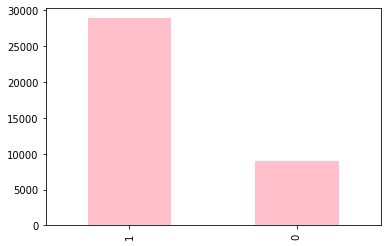

In [64]:
new_df['label'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

In [65]:
new_df['len'] = new_df['text'].str.len()

In [66]:
new_df.head()

,num,text,label,cleaned_timestamp,len
0,0.0,RT @uberdogfound: Please RT - Food needed for ...,1,"04/24/2011, 23:24",119
1,1.0,Please RT - Food needed for shelter in NC in a...,1,"04/24/2011, 23:24",137
2,3.0,‚ô°its raining and tornado warnings....about t...,1,"04/24/2011, 21:33",104
3,9.0,Lmao #damn RT @LuCeCaNNoNn: If I don't get any...,1,"04/24/2011, 18:24",111
4,10.0,Saved by the tornado warning....I'm just ready...,0,"04/24/2011, 18:09",68


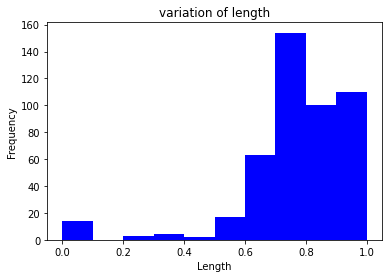

In [67]:
new_df.groupby('len').mean()['label'].plot.hist(color = 'blue', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

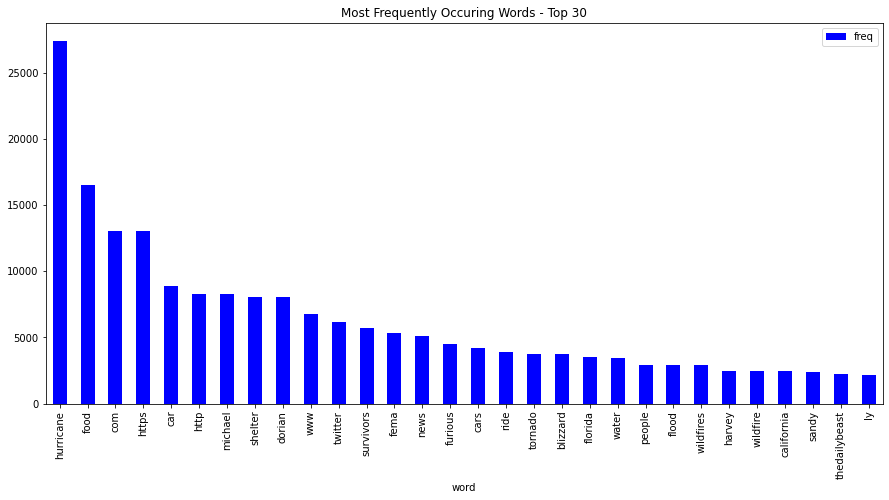

In [68]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(new_df.text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

In [71]:
mask = np.array(Image.open('twitter_mask.png'))

In [72]:
wc = WordCloud(stopwords = STOPWORDS,
               mask = mask, background_color = "white",
               max_words = 600, max_font_size = 500,
               random_state = 42, width = mask.shape[1],
               height = mask.shape[0],colormap='ocean')

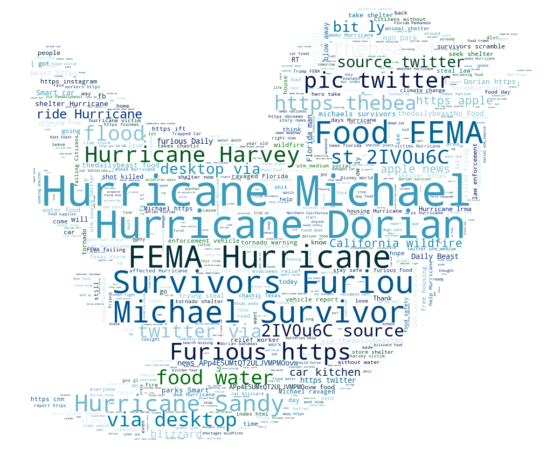

In [73]:
wc.generate(''.join(new_df['text']))
plt.figure(figsize=[16,8])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [112]:
wc2 = WordCloud(stopwords = STOPWORDS,
               mask = mask, background_color = "black",
               max_words = 600, max_font_size = 500,
               random_state = 42, width = mask.shape[0],
               height = mask.shape[0],colormap='YlGn')

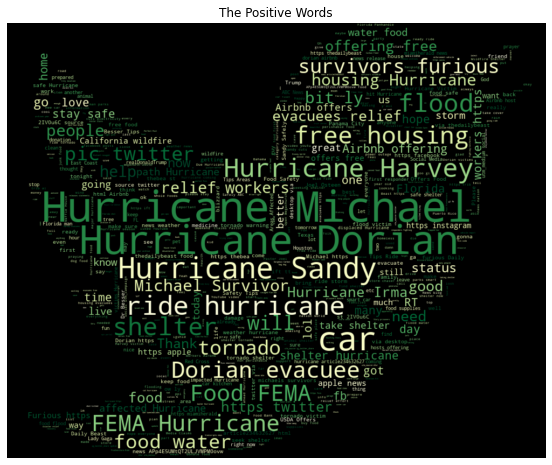

In [113]:
wc2.generate((' '.join([text for text in new_df['text'][new_df['label'] == 0]])))
plt.figure(figsize=[16,8])
plt.title('The Positive Words')
plt.imshow(wc2, interpolation="bilinear")
plt.axis('off')
plt.show()

In [105]:
wc3 = WordCloud(stopwords = STOPWORDS,
               mask = mask, background_color = "black",
               max_words = 600, max_font_size = 500,
               random_state = 42, width = mask.shape[0],
               height = mask.shape[0],colormap='hot')

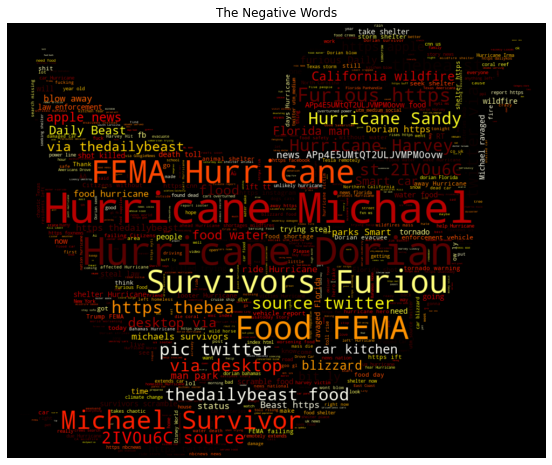

In [108]:
wc3.generate((' '.join([text for text in new_df['text'][new_df['label'] == 1]])))
plt.figure(figsize=[16,8])
plt.title('The Negative Words')
plt.imshow(wc3, interpolation="bilinear")
plt.axis('off')
plt.show()

In [117]:
new_df

,num,text,label,cleaned_timestamp,len
0,0.0,RT @uberdogfound: Please RT - Food needed for ...,1,"04/24/2011, 23:24",119
1,1.0,Please RT - Food needed for shelter in NC in a...,1,"04/24/2011, 23:24",137
2,3.0,‚ô°its raining and tornado warnings....about t...,1,"04/24/2011, 21:33",104
3,9.0,Lmao #damn RT @LuCeCaNNoNn: If I don't get any...,1,"04/24/2011, 18:24",111
4,10.0,Saved by the tornado warning....I'm just ready...,0,"04/24/2011, 18:09",68
...,...,...,...,...,...
4591,1844.0,Yumi is donating FREE organic baby food to tho...,0,"11/14/2018, 08:39",298
4592,297.0,Yup cali is burning again. #fire #california #...,1,"08/08/2018, 19:12",186
4593,1933.0,"Yup, 200 million dollars waisted on ""comfort s...",1,"11/15/2018, 12:56",268
4594,143.0,Zinke: What it will take to prevent deadly wil...,1,"11/26/2018, 20:51",168
